In [1]:
from GrafTo.analysis.RunningCA import ContactAngle
import os
import MDAnalysis as mda
import matplotlib.pyplot as plt

100 frames from 834 total. Starting from frame 734.


  0%|          | 0/100 [00:00<?, ?it/s]

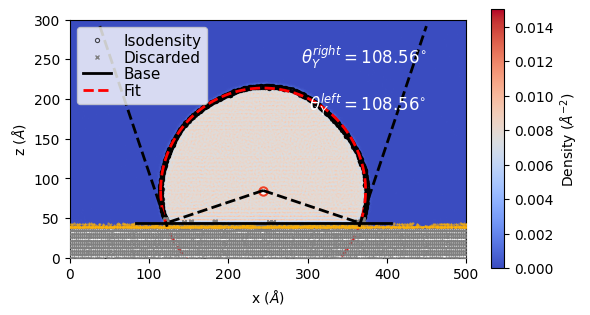

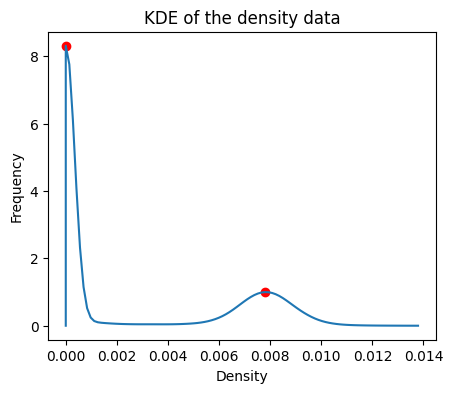

In [2]:
#--- Set the directory where the files are located ----#

current_dir = os.getcwd()

#--- Load the universe with MDAnalysis ---#

universe = mda.Universe(current_dir + '/md_grafted.gro', current_dir + '/md_grafted.xtc')

#--- Create the system using the ContactAngle class ---#

#  - root is the directory where the files are located
#  - universe is the MDAnalysis universe
System = ContactAngle(root=current_dir, universe=universe)

#---- Set baseline ---#

#  Select the beads of the interface with the droplet, to set a base line for calculating the contact angle (in this case, the silane beads)
# When the interface is not flat, but of grafted chains, an adjustment to the base line may be needed

surface_beads = System.universe.select_atoms("resname SIL")
baseLine = surface_beads.positions[:,2].max() # from angstroms to nanometers

#--- Calculate the contact angle ---#
  
#  - solvent_beads are the beads of the solvent
#  - nframes is the number of frames to use (at least 80 frames are recommended)
#  - averaged_axes is the list axes to average the contact angle (in case of a non cylindrical droplet, you may want to average in two different axes)
#  - cmap is the colormap to use for the density plot
#  - baseLine is the base line to calculate the contact angle
#  - distFromBase is the distance from the base line where points below will be discarded for fitting the circle
#  - contour is a boolean to plot the contour plot
#  - cuts is a list of limits for the system (xmin, xmax, ymin, ymax)
#  - fig is a list of the figure(s) to plot the contact angle(s). If None, a new figure will be created
#  - tilt is the angle to tilt the baseLine, in case the interface is not horizontal
#  - mols_to_plot is a dictionary of molecules to plot the contact angle with their respective color
#  - delta is a shift in the plotted molecules that are not in the density plot, for better adjust the superimposing images

fig, ax, theta = System.calc_contact_angle(solvent_beads=["W","SW","TW"], nframes=100, averaged_axis=1, cmap="coolwarm", baseLine=baseLine, distFromBase=5, contour=True, cuts=[0,500,0,300], tilt=None, mols_to_plot={"SIL":"xkcd:amber","SI":"gray","SUR":"gray"}, delta=None)

100 frames from 834 total. Starting from frame 734.


  0%|          | 0/100 [00:00<?, ?it/s]

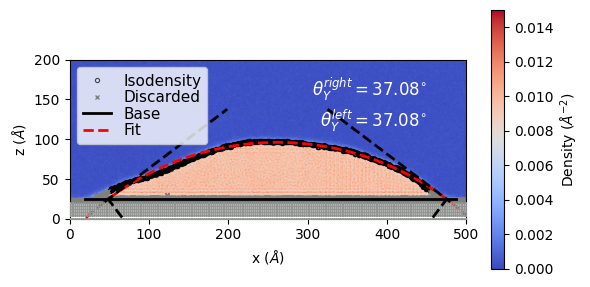

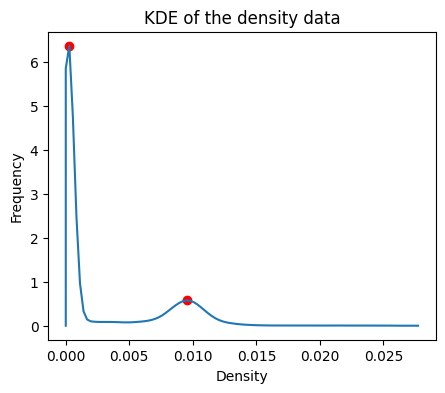

In [4]:
#----  Same calculation for different surface ----#

current_dir = os.getcwd()

universe = mda.Universe(current_dir + '/md_N2.gro', current_dir + '/md_N2.xtc')

System = ContactAngle(root=current_dir, universe=universe)

surface_beads = System.universe.select_atoms("resname SUR")
baseLine = surface_beads.positions[:,2].max()

fig, ax, theta = System.calc_contact_angle(solvent_beads=["W","SW","TW"], nframes=100, averaged_axis=1, cmap="coolwarm", baseLine=baseLine+5, distFromBase=10, contour=True, cuts=[0,500,0,200], tilt=None, mols_to_plot={"SUR":"xkcd:gray"}, delta=None)